In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download gauravduttakiit/resume-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0
  0% 0.00/383k [00:00<?, ?B/s]
100% 383k/383k [00:00<00:00, 741MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/resume-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [8]:
df.shape

(962, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [10]:
df["Category"]

,Category
0,Data Science
1,Data Science
2,Data Science
3,Data Science
4,Data Science
...,...
957,Testing
958,Testing
959,Testing
960,Testing


In [11]:
df["Category"].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


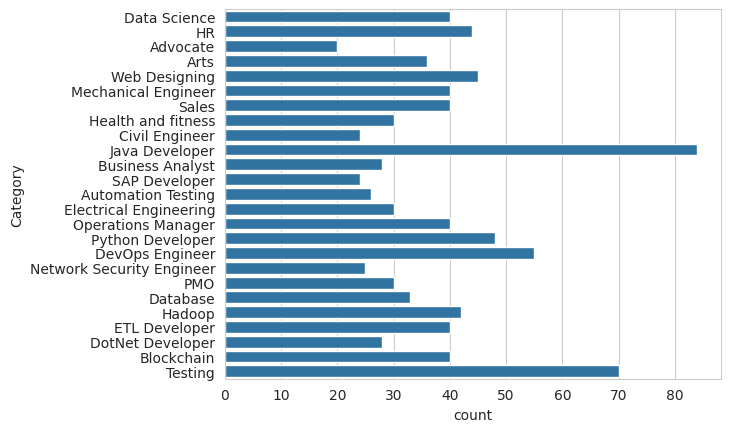

In [12]:
sns.set_style("whitegrid")
sns.countplot(df["Category"])
plt.show()

In [13]:
df["Category"].nunique()

25

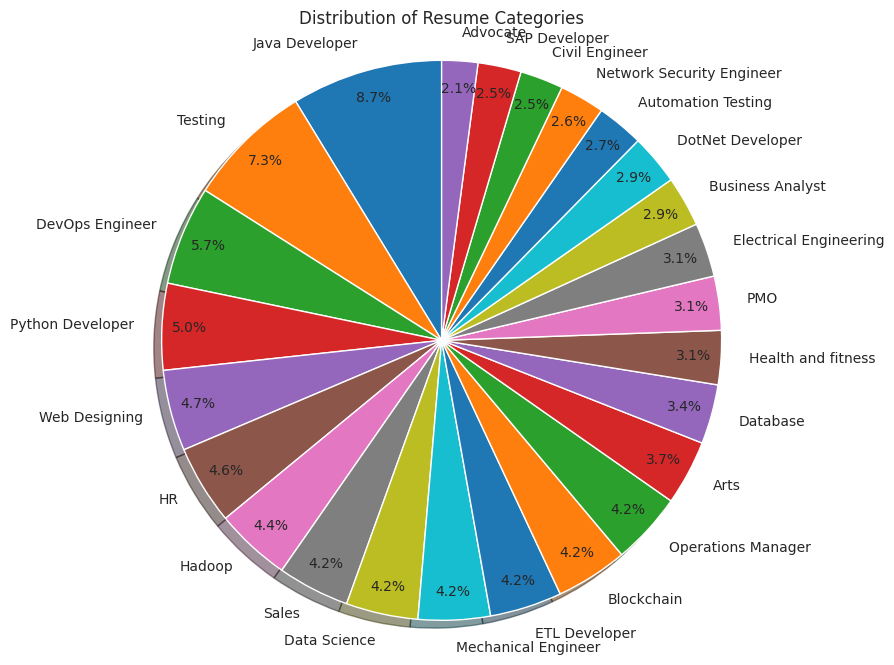

In [14]:
category_counts = df["Category"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',shadow=True, startangle=90, pctdistance=0.90)
plt.title('Distribution of Resume Categories')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
df["Category"][0]

'Data Science'

In [16]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

clean text

| Regex          | Meaning                              |
| -------------- | ------------------------------------ |
| `\S+`          | one or more **non-space characters** |
| `http\S+`      | URLs                                 |
| `@\S+`         | mentions                             |
| `#\S+`         | hashtags                             |
| `[^\x00-\x7f]` | non-ASCII (emojis)                   |
| `\s+`          | multiple spaces                      |


In [17]:
import re
import string

def cleanResume(txt):
    cleanTxt = re.sub(r'http\S+\s', '', txt)
    cleanTxt = re.sub(r'@\S+', ' ', cleanTxt)
    cleanTxt = re.sub(r'#\S+', ' ', cleanTxt)
    cleanTxt = re.sub(r'RT|cc', ' ', cleanTxt)
    cleanTxt = re.sub(r'[%s]' % re.escape(string.punctuation), '', cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]', '', cleanTxt)
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt)

    return cleanTxt.lower().strip()


In [18]:
df["Cleaned_Resume"] = df["Resume"].apply(cleanResume)

In [19]:
df1=df[["Resume","Cleaned_Resume"]]
df1.head()

,Resume,Cleaned_Resume
0,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 be uitr...
2,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Category_encoded"]=le.fit_transform(df["Category"])

In [21]:
df[["Category","Category_encoded"]].value_counts()

,,count
Category,Category_encoded,
Java Developer,15,84
Testing,23,70
DevOps Engineer,8,55
Python Developer,20,48
Web Designing,24,45
HR,12,44
Hadoop,13,42
Data Science,6,40
Blockchain,3,40


Imports TF-IDF vectorizer from scikit-learn.

Converts text → numbers

Removes English stop words automatically

Computes TF-IDF scores

TF-IDF means:

TF (Term Frequency): how often a word appears in a document

IDF (Inverse Document Frequency): reduces importance of common words

->Important words get higher weight

fit() → learns vocabulary from resumes

transform() → converts each resume to a vector

Output is a sparse matrix

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english")

new_cleanText=tfidf.fit_transform(df["Cleaned_Resume"])
new_cleanText.shape


(962, 7902)

### 7,902 features

Because after:

cleaning

lowercasing

stop-word removal

tokenization

TF-IDF found 7,902 unique meaningful words across all resumes.

## fine-tuned the TF-IDF vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    min_df=0.02,# word must appear in at least 2% of documents
    max_df=0.9# word must appear in at most 90% of documents
)


new_cleanText=tfidf.fit_transform(df["Cleaned_Resume"])
new_cleanText.shape




(962, 2586)

After applying document frequency thresholds and n-grams, the feature space reduced from 7,902 to 2,586, improving efficiency while retaining important terms

In [24]:
X=new_cleanText
y=df["Category_encoded"]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape

(769, 2586)

In [27]:
y_train.shape

(769,)

## LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)

#prediction

log_y_pred=log.predict(X_test)
print(log_y_pred)

#evaluate

print("Accuracy:", accuracy_score(y_test, log_y_pred))
print(classification_report(y_test, log_y_pred))



[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23  6 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20  6  6  7
 23]
Accuracy: 0.9948186528497409
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
   

## OneVsRest with Logistic Regression


In [30]:
from sklearn.multiclass import OneVsRestClassifier

log_ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
log_ovr.fit(X_train, y_train)

# Predictions
log_ovr_y_pred = log_ovr.predict(X_test)
print(log_ovr_y_pred)

#evaluate
print("Accuracy:", accuracy_score(y_test, log_ovr_y_pred))
print(classification_report(y_test, log_ovr_y_pred))

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23  6 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20  6  6  7
 23]
Accuracy: 0.9948186528497409
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
   

## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_y_pred=knn.predict(X_test)
print(knn_y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  6 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [32]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))


Accuracy: 0.9792746113989638
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       0.75      0.60      0.67         5
           7       1.00      0.88      0.93         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         

### OneVsRestClassifier with KNN

Standard classifiers (like Logistic Regression or SVM) are binary by default

OneVsRest allows them to handle multi-class problems

In [33]:
from sklearn.multiclass import OneVsRestClassifier

knn_ovr = OneVsRestClassifier(KNeighborsClassifier())
knn_ovr.fit(X_train, y_train)

# Predictions
knn_ovr_y_pred = knn_ovr.predict(X_test)
print(knn_ovr_y_pred)
# Evaluation
print("Accuracy:", accuracy_score(y_test, knn_ovr_y_pred))
print(classification_report(y_test, knn_ovr_y_pred))

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  6 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
Accuracy: 0.9792746113989638
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
   

## Saving Model & Vectorizer & encoder

In [52]:
import pickle
pickle.dump(log,open("log.pkl","wb"))
pickle.dump(tfidf,open("tfidf.pkl","wb"))
pickle.dump(le, open("label_encoder.pkl", "wb"))


## Preprocess a new resume & Predict using the loaded model

In [59]:
import pickle

# Load model, vectorizer, and label encoder
log = pickle.load(open("log.pkl", "rb"))
tfidf = pickle.load(open("tfidf.pkl", "rb"))
le = pickle.load(open("label_encoder.pkl", "rb"))


# New resume
new_resume = """Experienced Python developer with knowledge in Machine Learning, NLP, and data analysis."""

# Clean resume
Cleaned_Resume = cleanResume(new_resume)

# Vectorize
input_feature = tfidf.transform([Cleaned_Resume])

# Predict encoded class
pred_encoded = log.predict(input_feature)[0]
print(f"Encoded predicted category:",pred_encoded)

# Decode to actual category name
pred_category = le.inverse_transform([pred_encoded])[0]

print("Predicted Category name:", pred_category)

# Prediction probabilities
proba = log.predict_proba(input_feature)[0]

print("\nPrediction Probabilities:")
for idx, p in enumerate(proba):
    print(f"{le.inverse_transform([idx])[0]}({idx}): {p:.4f}")


Encoded predicted category: 6
Predicted Category name: Data Science

Prediction Probabilities:
Advocate(0): 0.0218
Arts(1): 0.0243
Automation Testing(2): 0.0215
Blockchain(3): 0.0261
Business Analyst(4): 0.0195
Civil Engineer(5): 0.0143
Data Science(6): 0.3180
Database(7): 0.0255
DevOps Engineer(8): 0.0186
DotNet Developer(9): 0.0187
ETL Developer(10): 0.0305
Electrical Engineering(11): 0.0221
HR(12): 0.0250
Hadoop(13): 0.0335
Health and fitness(14): 0.0206
Java Developer(15): 0.0375
Mechanical Engineer(16): 0.0326
Network Security Engineer(17): 0.0164
Operations Manager(18): 0.0155
PMO(19): 0.0155
Python Developer(20): 0.1549
SAP Developer(21): 0.0198
Sales(22): 0.0195
Testing(23): 0.0244
Web Designing(24): 0.0238
